# Data Analysis of __'Moksh Ornaments'__ stock price 
Things i will be looking for-
1. Is there any correlation between price and volume.
2. How Google trends can help me to find pattern in search keywords related to stock and price. 

# 1. Import libraries

In [108]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [109]:
#importing data
day_data=yf.download('moksh.ns', start= '2021-10-01', end ='2022-02-22', interval='1d')
day_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,40.250000,40.950001,39.750000,40.250000,40.134838,492995
2021-10-04,40.900002,41.799999,40.299999,40.799999,40.683262,820981
2021-10-05,41.150002,41.150002,40.700001,40.750000,40.633408,603983
2021-10-06,41.000000,41.400002,40.450001,41.250000,41.131977,957183
2021-10-07,42.400002,42.400002,41.200001,41.799999,41.680401,420128
...,...,...,...,...,...,...
2022-02-15,22.000000,22.700001,22.000000,22.000000,22.000000,1166135
2022-02-16,20.900000,22.000000,20.900000,21.400000,21.400000,1217315
2022-02-17,21.850000,22.450001,20.350000,22.450001,22.450001,2063200


# 2. Set aside Adjusted close and volume data.

In [110]:
# volume = df['Volume']
# Adjclose = df['Adj Close']
day_data = day_data[['Adj Close', 'Volume']]
day_data

,Adj Close,Volume
Date,,
2021-10-01,40.134838,492995
2021-10-04,40.683262,820981
2021-10-05,40.633408,603983
2021-10-06,41.131977,957183
2021-10-07,41.680401,420128
...,...,...
2022-02-15,22.000000,1166135
2022-02-16,21.400000,1217315
2022-02-17,22.450001,2063200


# 3. Data cleaning and sorting

In [111]:
#checking for nulls
day_data.isnull().sum()

Adj Close    0
Volume       0
dtype: int64

In [112]:
# checking for datatypes
day_data.dtypes

Adj Close    float64
Volume         int64
dtype: object

In [113]:
#Converting same dtypes for both columns
day_data =day_data.astype({'Volume':'float'})
day_data.dtypes

Adj Close    float64
Volume       float64
dtype: object

# 4. Check for relations in both price and volume

<function matplotlib.pyplot.show(close=None, block=None)>

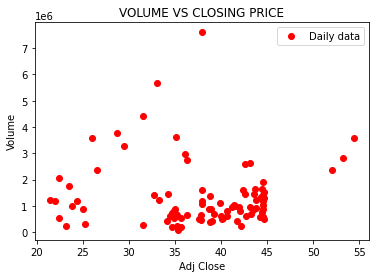

In [114]:
# plotting scatter plot between price and volume
x= day_data['Adj Close']
y= day_data['Volume']
plt.plot(x, y, 'o', color = 'Red', label = 'Daily data')
plt.title('VOLUME VS CLOSING PRICE')
plt.xlabel('Adj Close')
plt.ylabel('Volume')
plt.legend()
plt.show

In [115]:
#check for correlation between price and volume
day_data.corr()

,Adj Close,Volume
Adj Close,1.000000,-0.018004
Volume,-0.018004,1.000000



The theory is that when price and volume move together, the stock is "acting" correctly. Therefore, the higher the correlation, the better acting the stock is. If the correlation is strongly negative, we may see a constructive short forming. In this scenario we can see there isnt a strong correlation between price and volume so we cant say confidently that if price increasing volume will also increase and if it isnt it will be a false move.

# 5.Using pytrends to see keyword trend of this stock
pytrends in an API which helps to get google trends data from google about any particular or a group or keywords.
here we will try to find out the popularity of the keyword during the same time interval.

In [116]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl= 'en-US', tz=330)
kw_list=['Moksh ornaments']

In [117]:
pytrends.build_payload(kw_list, cat=0, timeframe= '2021-10-01 2022-02-22', geo='', gprop='')

In [118]:
trends = pytrends.interest_over_time()
related_queries = pytrends.related_queries()

In [119]:
trends.head()
trends =trends.drop(columns=['isPartial'])
# # trends.isnull().sum()

array([<AxesSubplot:xlabel='date'>], dtype=object)

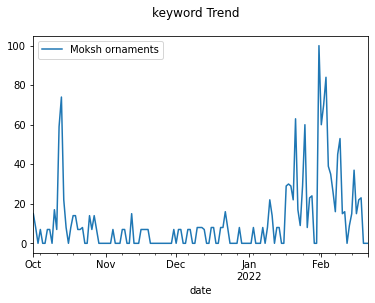

In [120]:
trends.plot(title = "keyword Trend", subplots= True)

# 
In this chart 100 means highest popularity in terms of searches so if graph is near 100 it means it was highly searched at that time

In [121]:
#combining trend with day_data 
day_data.insert(2, 'Trend', trends['Moksh ornaments'], allow_duplicates = True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

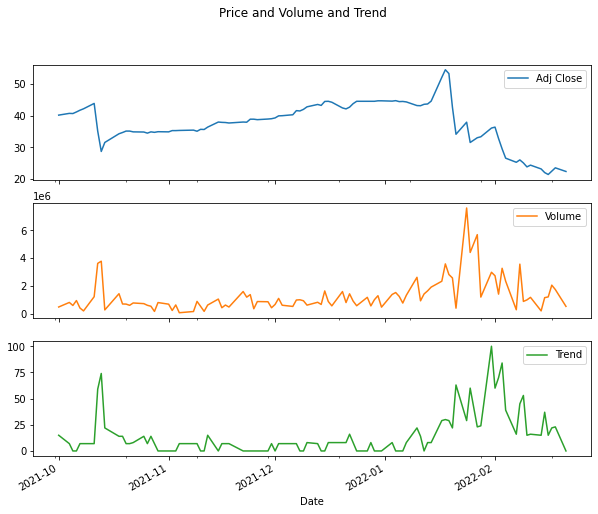

In [122]:
day_data.plot(title = "Price and Volume and Trend", subplots= True, figsize= (10,8))

# Conclusion
we find out from the above analysis that It isnt important for price to correlates with volume specially in case of this stock. we found a negative corrrelation between price and volume.
This should be considered while trading the stock any anomalies should be ignored.
anomalies(if price increasing without volume and vice versa).
__Regarding keyword trend we can see that when there is high movement in stock there are high searches regarding it so we can use it even in daily or hourly basis to get an idea about volatility__. 